### SETUP

Using *Python* and *R* in the same notebook.

In [1]:
import os
import subprocess

# Auto-detect R_HOME for Homebrew R installation
if 'R_HOME' not in os.environ:
    try:
        r_home = subprocess.check_output(['R', 'RHOME'], stderr=subprocess.DEVNULL).decode().strip()
        os.environ['R_HOME'] = r_home
    except Exception:
        pass

%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Error importing in API mode: ImportError("dlopen(/Users/wongpeiting/.pyenv/versions/3.13.9/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <B96A8100-FA7A-3EFC-8726-931D26646DE6> /Users/wongpeiting/.pyenv/versions/3.13.9/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Loading CLEANED CSV into a DataFrame

df = pd.read_csv('factually_pofma_cleaned.csv')
df

,year,date,title,summary,item_url,article_text,topic,directed_at,type,pofma_link,pofma_order,pofma_ed,minister,ministry,new_topic
0,2025,2025-11-15,Corrections regarding false statements concern...,MalaysiaNow had communicated falsehoods concer...,https://www.factually.gov.sg/corrections-and-c...,The Ministry of Home Affairs ('\nMHA') is ...,Justice (Read: Death Penalty),MalaysiaNow,Media,https://www.pofmaoffice.gov.sg/files/media-rel...,The Minister for Law and Second Minister for H...,Yes,Edwin Tong,NaN,Criminal Justice
1,2025,2025-09-22,Corrections regarding false statements of fact...,Mr Nicholas Tan communicated multiple false st...,https://www.factually.gov.sg/corrections-and-c...,"On 9, 15 and 16 September 2025, Mr Tan publish...","Governance (Read: Election, Policies)",Nicholas Tan; Aupen,Businessman,https://www.pofmaoffice.gov.sg/files/media-rel...,The Minister for Law and Second Minister for H...,Yes,Edwin Tong,NaN,Governance
2,2025,2025-09-07,Corrections regarding false statements of fact...,Mr Jay Ish'haq Rajoo communicated false statem...,https://www.factually.gov.sg/corrections-and-c...,1. Mr Jay Ish'haq Rajoo ('\nMr Jay')...,"Governance (Read: Election, Policies)",Jay Ishhaq Rajoo,Political figure,https://www.pofmaoffice.gov.sg/files/media-rel...,"Acting Minister for Culture, Community & Youth...",Yes,NaN,NaN,Election Claims
3,2025,2025-09-01,Corrections regarding false statements by Samm...,Mr Sammy Obeid communicated false statements o...,https://www.factually.gov.sg/corrections-and-c...,"Mr Obeid published posts on Facebook, Instagra...","Governance (Read: Election, Policies)",Sammy Obeid,Stand-up comedian,https://www.pofmaoffice.gov.sg/files/media-rel...,Minister for Digital Development and Informati...,Yes,NaN,NaN,Governance
4,2025,2025-05-20,"What are CPF monies invested in, and how are C...",Your CPF savings are invested by the CPF Board...,https://www.factually.gov.sg/corrections-and-c...,"What are CPF monies invested in, and how are C...",Finance (Read: CPF & Reserves),General Explainer,Government,NaN,NaN,No,NaN,NaN,National Reserves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2018,2018-09-16,Does our Prime Minister get paid up to $4.5 mi...,Factually addresses inaccurate reports on Mini...,https://www.factually.gov.sg/corrections-and-c...,Falsehoods:\nFalsehood #1\n:\nThe Government i...,Finance (Read: CPF & Reserves),General Explainer,Government,NaN,NaN,No,NaN,NaN,National Reserves
120,2018,2018-08-27,Are more foreigners taking away jobs of Singap...,"Ministry of Manpower responds to this, and oth...",https://www.factually.gov.sg/corrections-and-c...,A recent article by the States Times Review (S...,"Employment (Read: Cost of Living, Foreigners)",Alex Tan,Media,NaN,NaN,No,NaN,NaN,Cost of Living
121,2018,2018-07-31,Will the Government take back unused MediSave ...,All MediSave top-ups will remain in citizens' ...,https://www.factually.gov.sg/corrections-and-c...,[Updated as of April 2025]\nA voice recording ...,Finance (Read: CPF & Reserves),General Explainer,Government,NaN,NaN,No,NaN,NaN,National Reserves
122,2018,2018-03-31,Singapore's national reserves: Is the Governme...,We need to be ready to deal with unforeseen ev...,https://www.factually.gov.sg/corrections-and-c...,There have been suggestions that the Governmen...,Finance (Read: CPF & Reserves),General Explainer,Government,NaN,NaN,No,NaN,NaN,National Reserves


### Let's plot

In [4]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Timeline dot plot

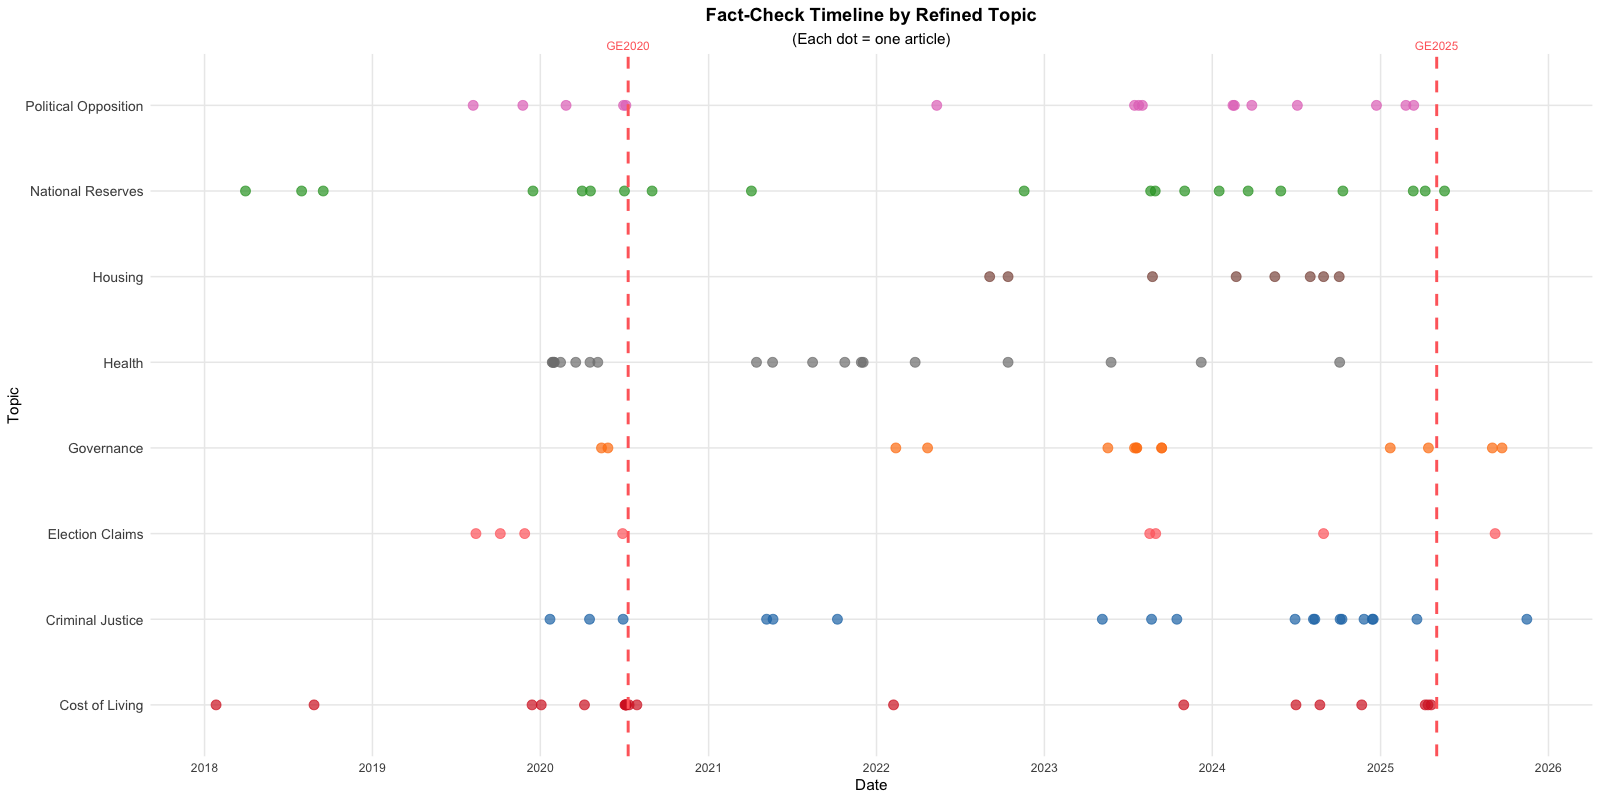

In [5]:
%%R -i df -w 16 -h 8 --units in -r 100

# Merge Political Opposition + Governance
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c( "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )


# Convert date column
df$date <- as.Date(df$date)

# Define topic order (bottom to top)
topic_order <- c(
  "Criminal Justice",
  "Election Claims", 
  "Politics & Governance",
  "Housing",
  "Cost of Living",
  "National Reserves",
  "Health"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

# Define colors for each topic
topic_colors <- c(
  "Health" = "#7f7f7f",
  "National Reserves" = "#2ca02c",
  "Cost of Living" = "#d62728",
  "Housing" = "#8c564b",
  "Political Opposition" = "#e377c2",
  "Governance" = "#ff7f0e",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#1f77b4"
)

# Election dates
ge2020 <- as.Date("2020-07-10")
ge2025 <- as.Date("2025-05-03")

# Create the plot
ggplot(df, aes(x = date, y = new_topic, color = new_topic)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "#ff6b6b", linewidth = 1) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "#ff6b6b", linewidth = 1) +
  annotate("text", x = ge2020, y = Inf, label = "GE2020", vjust = -0.5, color = "#ff6b6b", size = 3) +
  annotate("text", x = ge2025, y = Inf, label = "GE2025", vjust = -0.5, color = "#ff6b6b", size = 3) +
  scale_color_manual(values = topic_colors) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  labs(
    title = "Fact-Check Timeline by Refined Topic",
    subtitle = "(Each dot = one article)",
    x = "Date",
    y = "Topic"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 10)
  ) +
  coord_cartesian(clip = "off")

## Are my eyes tricking me that dots cluster around election season?

In [6]:
%%R
# Are there disproportionately more corrections or clarifications before elections?

library(dplyr)

window_days <- 60

df <- df %>%
  mutate(
    before_ge =
      (date >= ge2020 - window_days & date < ge2020) |
      (date >= ge2025 - window_days & date < ge2025)
  )

In [7]:
%%R # Raw count of how many articles are near election dates vs. not

df |>
  count(before_ge)

  before_ge   n
1     FALSE 104
2      TRUE  20


In [8]:
%%R # Compare article counts to how much time exists in each condition.

# Total timeline: (Feb 9, 2026 - earliest article date)
total_days <- as.numeric(as.Date("2026-02-09") - min(df$date))

# Before-election days --> Two elections × 60 days:
before_days <- window_days * 2

# Non-election days:
non_before_days <- total_days - before_days

# Compute rates of article publication per day in each condition:
df %>%
  count(before_ge) %>%
  mutate(
    days = ifelse(before_ge, before_days, non_before_days),
    articles_per_day = n / days
  )

# LOOKING AT RESULT: 

# Before elections:
# ~0.167 articles per day
# → roughly 1 article every 6 days

# Outside those windows:
# ~0.038 articles per day
# → roughly 1 article every 26 days

  before_ge   n days articles_per_day
1     FALSE 104 2816       0.03693182
2      TRUE  20  120       0.16666667


In [9]:
%%R # Making sure this is not driven by one election

df %>%
  mutate(
    before_bucket = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "GE2020",
      date >= ge2025 - 60 & date < ge2025 ~ "GE2025",
      TRUE ~ "Other"
    )
  ) %>%
  count(before_bucket)

# INTERPRETING RESULT: The effect is NOT driven by a single election.
# Both elections show elevated activity.

  before_bucket   n
1        GE2020  12
2        GE2025   8
3         Other 104


In [10]:
%%R # Testing it with a Chi-Square test for statistical significance

# If articles were randomly distributed across time, proportional to how many days exist in each condition… would we see counts this extreme?

observed <- df %>% count(before_ge) %>% pull(n)

expected_probs <- c(
  non_before_days / total_days,   # FALSE first
  before_days / total_days       # TRUE second
)

chisq.test(observed, p = expected_probs)

# INTERPRETATION: Under the “random timing” assumption, this outcome is extraordinarily unlikely, so you can safely reject the idea that this is just calendar noise. That is the minimum bar for claiming a patterned temporal effect.


	Chi-squared test for given probabilities

data:  observed
X-squared = 45.868, df = 1, p-value = 1.265e-11



In [11]:
%%R # Calculate the effect size

before_share <- observed[2] / sum(observed)
expected_share <- before_days / total_days

lift <- before_share / expected_share
lift

# The pre-election window contains 3.9× more articles than we would expect if publication were evenly distributed across time.

[1] 3.946237


In [12]:
%%R # What kind of claims surge before elections?

# Use merged topics
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )


df %>%
  group_by(new_topic_merged) %>%
  summarise(
    before_rate = mean(before_ge),
    total_articles = n()
  ) %>%
  arrange(desc(before_rate))

# A tibble: 7 × 3
  new_topic_merged      before_rate total_articles
  <chr>                       <dbl>          <int>
1 Cost of Living              0.4               20
2 Politics & Governance       0.2               30
3 National Reserves           0.15              20
4 Election Claims             0.125              8
5 Criminal Justice            0.105             19
6 Health                      0                 19
7 Housing                     0                  8


In [13]:
%%R  # Clearer view

# Use merged topics
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )

baseline <- before_days / total_days

df %>%
  group_by(new_topic_merged) %>%
  summarise(
    before_rate = mean(before_ge),
    lift = before_rate / baseline,
    total_articles = n()
  ) %>%
  arrange(desc(lift))

# A tibble: 7 × 4
  new_topic_merged      before_rate  lift total_articles
  <chr>                       <dbl> <dbl>          <int>
1 Cost of Living              0.4    9.79             20
2 Politics & Governance       0.2    4.89             30
3 National Reserves           0.15   3.67             20
4 Election Claims             0.125  3.06              8
5 Criminal Justice            0.105  2.58             19
6 Health                      0      0                19
7 Housing                     0      0                 8


In [14]:
%%R # Acceleration toward Polling Day 

# QUESTION: Does activity gradually rise — or explode near the election?

df <- df %>%
  mutate(
    days_to_election = pmin(
      as.numeric(ge2020 - date),
      as.numeric(ge2025 - date),
      na.rm = TRUE
    ),
    
    accel_bucket = case_when(
      days_to_election >= 0 & days_to_election <= 30 ~ "0–30 days",
      days_to_election > 30 & days_to_election <= 60 ~ "31–60 days",
      TRUE ~ "Other"
    )
  )

df %>% count(accel_bucket)

# Convert to rates: 
# 0–30: 10 / 60 ≈ 0.167 per day
# 31–60: 2 / 60 ≈ 0.033 per day
# That is about a 5× jump as polling day approaches.

  accel_bucket   n
1    0–30 days  10
2   31–60 days   2
3        Other 112


In [15]:
%%R # Is this ramp topic-driven?

# Use merged topics
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )


df %>%
  filter(accel_bucket == "0–30 days") %>% # Filters the final 0–30 days before elections
  count(new_topic_merged, sort = TRUE)

       new_topic_merged n
1        Cost of Living 5
2 Politics & Governance 2
3      Criminal Justice 1
4       Election Claims 1
5     National Reserves 1


In [16]:
%%R # Pre vs Post Election

df <- df %>%
  mutate(
    election_phase = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "Before",
      date > ge2020 & date <= ge2020 + 60 ~ "After",
      date >= ge2025 - 60 & date < ge2025 ~ "Before",
      date > ge2025 & date <= ge2025 + 60 ~ "After",
      TRUE ~ "Other"
    )
  )

df %>% count(election_phase)

  election_phase   n
1          After   4
2         Before  20
3          Other 100


| Result | Interpretation |
| --- | --- |
| Before >> After | anticipatory |
| After >> Before | corrective / cleanup |
| Similar | cyclical |

In [17]:
%%R # GE2020 vs GE2025

df %>%
  mutate(
    which_ge = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "GE2020",
      date >= ge2025 - 60 & date < ge2025 ~ "GE2025",
      TRUE ~ "Other"
    )
  ) %>%
  count(which_ge)

  which_ge   n
1   GE2020  12
2   GE2025   8
3    Other 104


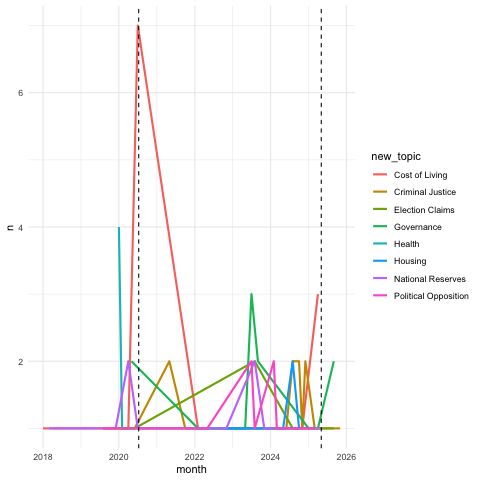

In [18]:
%%R # Topic Spike Chart

# Use merged topics
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )


library(lubridate)

df %>%
  mutate(month = floor_date(date, "month")) %>%
  count(month, new_topic) %>%
  ggplot(aes(month, n, color = new_topic)) +
  geom_line(linewidth = 1) +
  geom_vline(xintercept = ge2020, linetype = "dashed") +
  geom_vline(xintercept = ge2025, linetype = "dashed") +
  theme_minimal()

# Attempting bubble plot

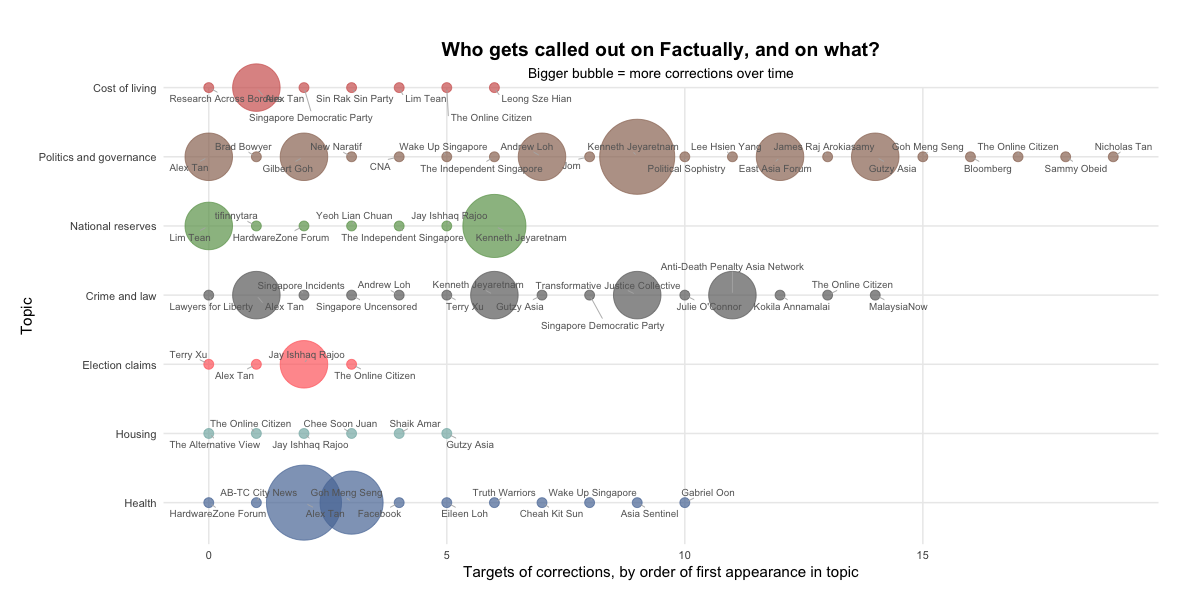

In [19]:
%%R -i df -w 12 -h 6 --units in -r 100
library(tidyverse)
library(ggrepel)

df$date <- as.Date(df$date)

# Merge Political Opposition + Governance FIRST
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )

targets_df <- df %>%
  filter(!grepl("General Explainer|Explainer|General Clarification",
                directed_at, ignore.case = TRUE)) %>%
  filter(!is.na(directed_at) & directed_at != "")

# Keep only the first target per row
targets_df <- targets_df %>%
  mutate(target = trimws(sapply(strsplit(directed_at, ";"), `[`, 1)))

# 1) Count bubbles - USE new_topic_merged
bubble_data <- targets_df %>%
  count(new_topic_merged, target, name = "count")

# 2) Compute FIRST appearance date *within topic*
first_seen <- targets_df %>%
  group_by(new_topic_merged, target) %>%
  summarise(first_date = min(date, na.rm = TRUE), .groups = "drop")

# 3) Join + rank within each topic
bubble_data <- bubble_data %>%
  left_join(first_seen, by = c("new_topic_merged", "target")) %>%
  group_by(new_topic_merged) %>%
  arrange(first_date, .by_group = TRUE) %>%
  mutate(target_num = row_number() - 1) %>%
  ungroup()

# Topic order (7 categories)
topic_order <- c("Cost of Living", "Politics & Governance", "National Reserves", "Criminal Justice", "Election Claims", "Housing", "Health")
bubble_data$new_topic_merged <- factor(bubble_data$new_topic_merged, levels = rev(topic_order))

# Colors (NO trailing + here)
topic_colors <- c(
  "Health" = "#5778a4",
  "National Reserves" = "#6a9f58",
  "Cost of Living" = "#d1615d",
  "Housing" = "#85b6b2",
  "Politics & Governance" = "#9a7461",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#6a6a6a"
)

ggplot(bubble_data, aes(x = target_num, y = new_topic_merged, size = count, color = new_topic_merged)) +
  geom_point(alpha = 0.7) +
  geom_text_repel(
    aes(label = target),
    size = 2.5,
    color = "gray40",
    max.overlaps = Inf,
    box.padding = 0.3,
    point.padding = 0.3,
    segment.color = "gray70",
    segment.size = 0.3,
    min.segment.length = 0
  ) +
  scale_size_continuous(range = c(3, 25), guide = "none") +
  scale_color_manual(values = topic_colors, guide = "none") +

  # ✅ Cleaner y labels (your requested mapping)
  scale_y_discrete(
    expand = expansion(mult = c(0.1, 0)),
    labels = c(
      "Cost of Living" = "Cost of living",
      "National Reserves" = "National reserves",
      "Politics & Governance" = "Politics and governance",
      "Criminal Justice" = "Crime and law",
      "Election Claims" = "Election claims",
      "Health" = "Health",
      "Housing" = "Housing"
    )
  ) +

  labs(
    title = "Who gets called out on Factually, and on what?",
    subtitle = "Bigger bubble = more corrections over time",
    x = "Targets of corrections, by order of first appearance in topic",
    y = "Topic"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 0.5, size = 10),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8)
  ) +
  coord_cartesian(clip = "off") +
  theme(
    plot.margin = margin(t = 30, r = 30, b = 15, l = 15)
  )


The bubble size represents how many times that person/organization was called out on that specific topic.
  - Large bubble = called out many times on that topic                                                                                                 
  - Small bubble = called out once or a few times on that topic           
  
  So if you see someone with a big bubble on a topic, it means they received multiple corrections on that topic. If someone has a tiny bubble, they were only called out once.  
                
  Note: The same person can appear multiple times (one bubble per topic they were called out on).  

### From this point onwards, I was plotting the dot plot while making methodological choices:

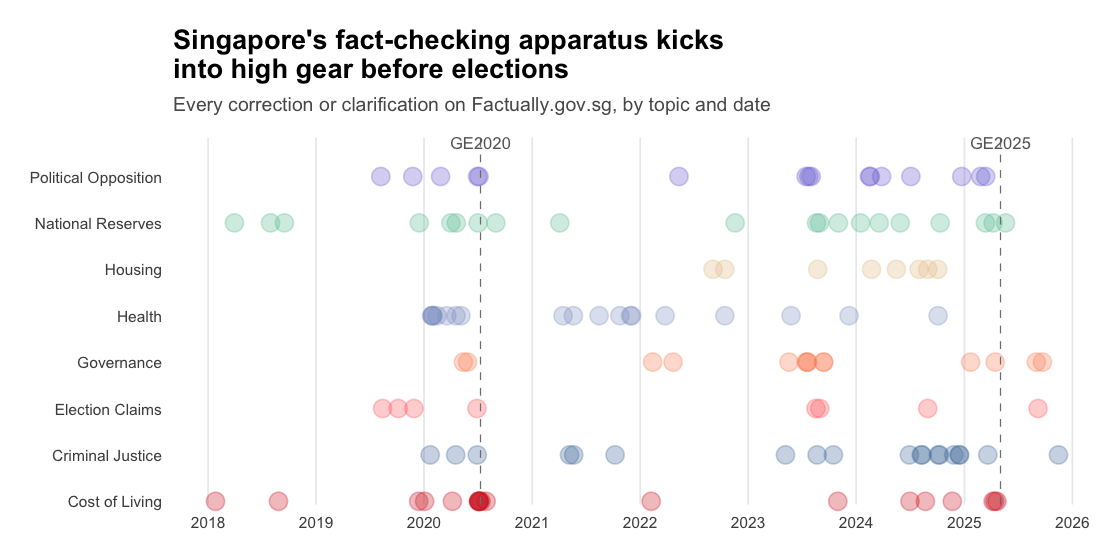

In [20]:
%%R -w 8 -h 4 --units in -r 140

# Merge Political Opposition + Governance
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c( "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )


# Topic order
topic_order <- c(
  "Health", "National Reserves", "Cost of Living", "Housing",
  "Political Opposition", "Governance", "Election Claims", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))

y_top <- length(topic_order) + 0.6

# Colors
topic_colors <- c(
  "Health" = "#8da0cb",
  "National Reserves" = "#66c2a5",
  "Cost of Living" = "#d62728",
  "Housing" = "#e5c494",
  "Political Opposition" = "#7b6fd6",
  "Governance" = "#fc8d62",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#4c78a8"
)

ggplot(df, aes(date, new_topic)) +
  # dots
  geom_point(aes(color = new_topic), size = 4, alpha = 0.3) +
  
  # election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  # geom_vline(xintercept = pofma, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  
  # election labels
  annotate("text", x = ge2020, y = y_top, label = "GE2020",
           vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025",
           vjust = 0, color = "grey40", size = 3) +
  # annotate("text", x = pofma, y = y_top, label = "POFMA",
  #          vjust = 0, color = "grey40", size = 3) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_discrete(expand = expansion(mult = c(0.01, 0.12))) +
  coord_cartesian(clip = "off") +
  
  labs(
    title = "Singapore's fact-checking apparatus kicks\ninto high gear before elections",
    subtitle = "Every correction or clarification on Factually.gov.sg, by topic and date",
    x = "", y = ""
  ) +
  
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 12)),
    plot.margin = margin(15, 10, 0, 0)
  )

### Annotate the points labelled General Explainer or General Clarification

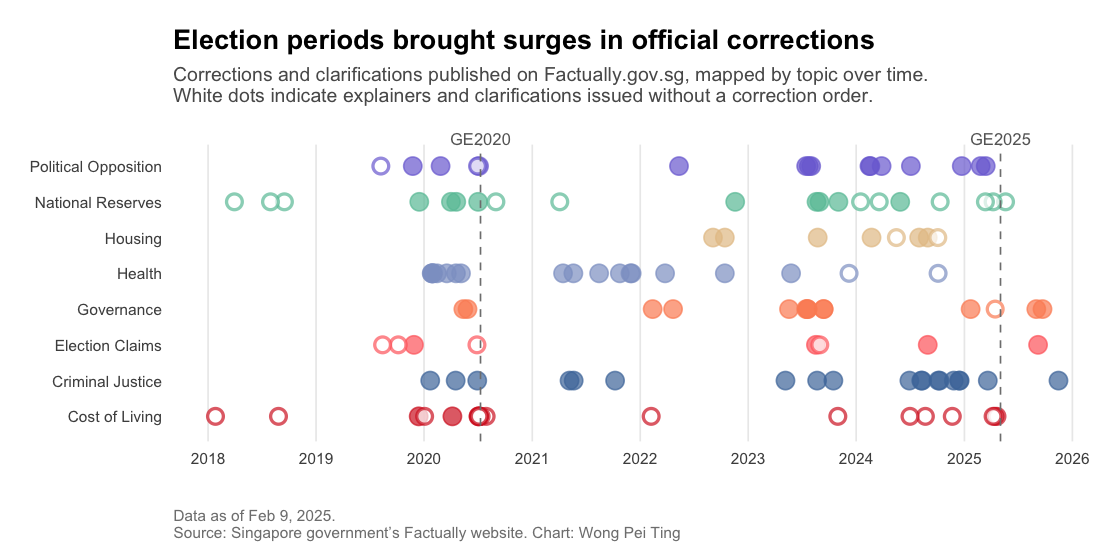

In [21]:
%%R -w 8 -h 4 --units in -r 140

# Merge Political Opposition + Governance
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c( "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )


# Add highlight flag for articles WITHOUT POFMA orders
df <- df %>%
  mutate(
    no_pofma = (pofma_ed == "No")
  )

# Topic order
topic_order <- c(
  "Cost of Living", "National Reserves", "Housing", "Health", "Political Opposition", "Governance", "Election Claims", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))

y_top <- length(topic_order) + 0.6

# Colors
topic_colors <- c(
  "Health" = "#8da0cb",
  "National Reserves" = "#66c2a5",
  "Cost of Living" = "#d62728",
  "Housing" = "#e5c494",
  "Political Opposition" = "#7b6fd6",
  "Governance" = "#fc8d62",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#4c78a8" 
)

# my data stretches to Feb9, 2026, not merely the last day there was an article on Factually -- Nov 15, 2025, which caps analysis at 2,850 days.
df <- df %>% mutate(date = as.Date(date))
ge2020 <- as.Date(ge2020)
ge2025 <- as.Date(ge2025)

end_date <- as.Date("2026-02-09")
start_date <- min(df$date, na.rm = TRUE)

ggplot(df, aes(date, new_topic)) +
  # Background dots: Articles WITH POFMA orders (solid)
  geom_point(
    data = df %>% filter(!no_pofma),
    aes(color = new_topic),
    size = 4,
    alpha = 0.7
  ) +
  
  # Highlight dots: Articles WITHOUT POFMA orders (white-centered)
  geom_point(
    data = df %>% filter(no_pofma),
    aes(color = new_topic),
    size = 3,
    alpha = 0.7,
    shape = 21,
    fill = "white",
    stroke = 1.2
  ) +
  
  # Key vertical lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  # geom_vline(xintercept = pofma, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  
  # Labels
  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +
  # annotate("text", x = pofma, y = y_top, label = "POFMA", vjust = 0, color = "grey40", size = 3) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_discrete(expand = expansion(mult = c(0.1, 0))) +
  coord_cartesian(clip = "off") +
  
  labs(
    title = "Election periods brought surges in official corrections",
    subtitle = "Corrections and clarifications published on Factually.gov.sg, mapped by topic over time.\nWhite dots indicate explainers and clarifications issued without a correction order.",
    x = "", y = "",
    caption = "Data as of Feb 9, 2025.\nSource: Singapore government’s Factually website. Chart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 20)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(
    size = 8,          # smaller than axis text
    color = "grey50",  # lighter tone
    hjust = 0,        # left-align (important — reads like a footnote)
    )
  )

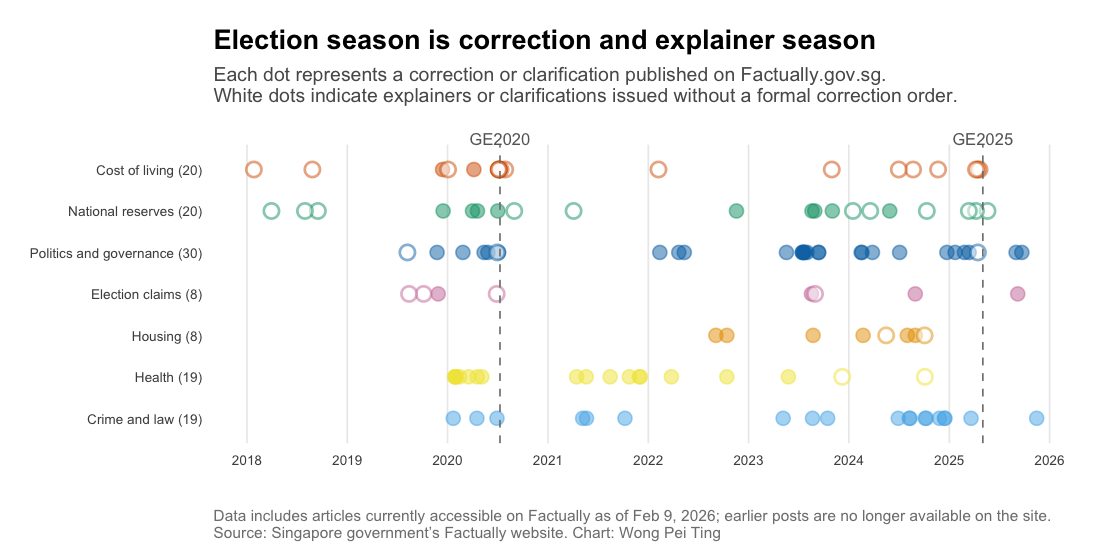

In [25]:
%%R -w 8 -h 4 --units in -r 140   # Merged topics and white-centered dots for non-POFMA articles.

# --- Prep ---
df <- df %>%
  mutate(
    date = as.Date(date),
    no_pofma = (pofma_ed == "No"),

    # Merge Political Opposition + Governance
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )

ge2020 <- as.Date(ge2020)
ge2025 <- as.Date(ge2025)

# Topic order (after merge)
topic_order <- c(
  "Cost of Living", "National Reserves", "Politics & Governance", "Election Claims", "Housing", "Health", "Criminal Justice"
)

df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))
y_top <- length(topic_order) + 0.6

# Colors (after merge)
topic_colors <- c(
  "Cost of Living" = "#D55E00",        # burnt orange — economic urgency
  "Politics & Governance" = "#0072B2", # strong institutional blue
  "Election Claims" = "#CC79A7",       # magenta — stands apart immediately
  "National Reserves" = "#009E73",     # deep green — fiscal / state
  "Housing" = "#E69F00",               # warm amber — visible, not beige
  "Criminal Justice" = "#56B4E9",      # lighter blue but clearly distinct
  "Health" = "#F0E442"                # yellow — only use if dots have outlines
)

# If you want the x-axis to extend to Feb 9, 2026 (even if no points),
# set explicit limits here:
start_date <- min(df$date, na.rm = TRUE)
end_date <- as.Date("2026-02-09")

ggplot(df, aes(date, new_topic_merged)) +
  # Background dots: Articles WITH POFMA orders (solid)
  geom_point(
    data = df %>% filter(!no_pofma),
    aes(color = new_topic_merged),
    size = 3,
    alpha = 0.5
  ) +

  # Highlight dots: Articles WITHOUT POFMA orders (white-centered)
  geom_point(
    data = df %>% filter(no_pofma),
    aes(color = new_topic_merged),
    size = 3,
    alpha = 0.5,
    shape = 21,
    fill = "white",
    stroke = 1
  ) +

  # Key vertical lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +

  # Labels
  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +

  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  scale_y_discrete(expand = expansion(mult = c(0.1, 0)), labels = c(
    "Cost of Living" = "Cost of living (20)",
    "National Reserves" = "National reserves (20)",
    "Politics & Governance" = "Politics and governance (30)",
    "Criminal Justice" = "Crime and law (19)",
    "Election Claims" = "Election claims (8)", 
    "Health" = "Health (19)",
    "Housing" = "Housing (8)"
  )) +
  coord_cartesian(clip = "off") +

  labs(
    title = "Election season is correction and explainer season",
    subtitle = "Each dot represents a correction or clarification published on Factually.gov.sg.\nWhite dots indicate explainers or clarifications issued without a formal correction order.",
    x = "", y = "",
    caption = "Data includes articles currently accessible on Factually as of Feb 9, 2026; earlier posts are no longer available on the site.\nSource: Singapore government’s Factually website. Chart: Wong Pei Ting"
  ) +

  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 7),
    axis.text.x = element_text(size = 7),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 20)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(
      size = 8,
      color = "grey50",
      hjust = 0
    )
  )

### Distance-to-election curve

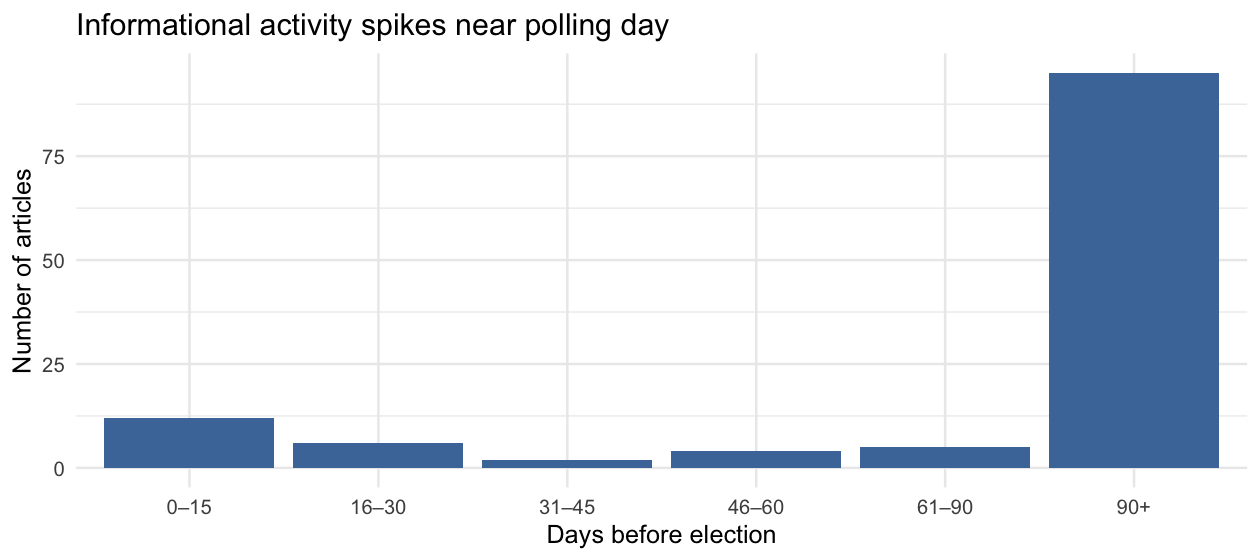

In [27]:
%%R -w 9 -h 4 --units in -r 140

df_curve <- df %>%
  mutate(
    date = as.Date(date),

    # distance to the closest election
    days_to_election = pmin(
      abs(as.numeric(ge2020 - date)),
      abs(as.numeric(ge2025 - date))
    ),

    # bucket into simple intervals
    bucket = case_when(
      days_to_election <= 15  ~ "0–15",
      days_to_election <= 30  ~ "16–30",
      days_to_election <= 45  ~ "31–45",
      days_to_election <= 60  ~ "46–60",
      days_to_election <= 90  ~ "61–90",
      TRUE ~ "90+"
    )
  )

df_curve %>%
  count(bucket) %>%
  mutate(bucket = factor(bucket, levels = c("0–15","16–30","31–45","46–60","61–90","90+"))) %>%
  ggplot(aes(bucket, n)) +
  geom_col(fill = "#4c78a8") +
  labs(
    title = "Informational activity spikes near polling day",
    x = "Days before election",
    y = "Number of articles"
  ) +
  theme_minimal(base_size = 13)


### Improving on dot plot

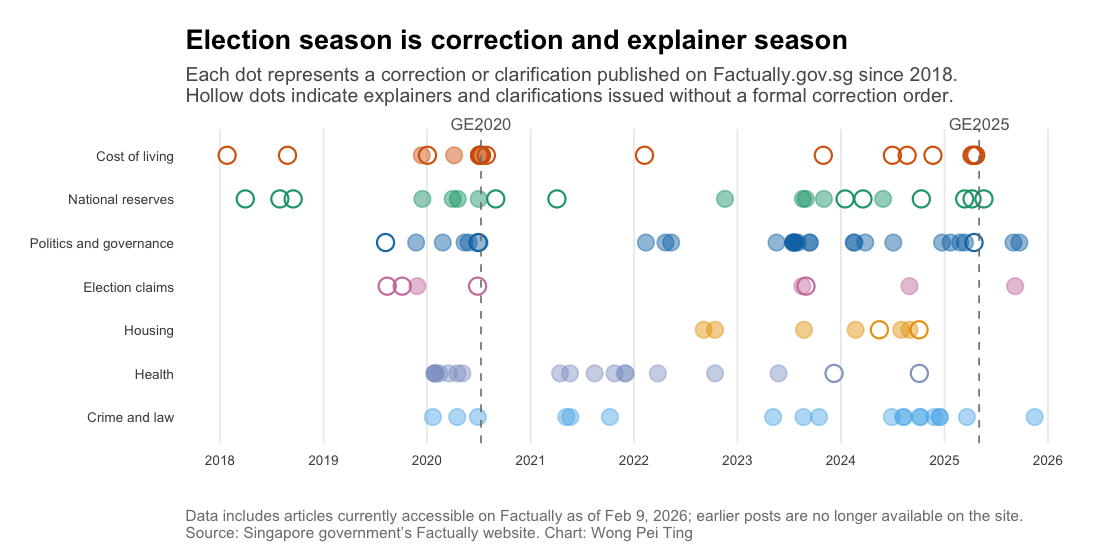

In [28]:
%%R -w 8 -h 4 --units in -r 140

# --- Prep ---
df <- df %>%
  mutate(
    date = as.Date(date),
    no_pofma = (pofma_ed == "No"),
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )

ge2020 <- as.Date(ge2020)
ge2025 <- as.Date(ge2025)

# Topic order (after merge)
topic_order <- c(
  "Cost of Living", "National Reserves", "Politics & Governance",
  "Election Claims", "Housing", "Health", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))
y_top <- length(topic_order) + 0.6

# Colors (replace low-contrast yellow for Health)
topic_colors <- c(
  "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "Election Claims" = "#CC79A7",
  "National Reserves" = "#009E73",
  "Housing" = "#E69F00",
  "Criminal Justice" = "#56B4E9",
  "Health" = "#8DA0CB"   # swapped from yellow to a legible blue-grey
)

start_date <- min(df$date, na.rm = TRUE)
end_date <- as.Date("2026-02-09")

ggplot(df, aes(date, new_topic_merged)) +

  # Solid dots: WITH formal correction order
  geom_point(
    data = df %>% filter(!no_pofma),
    aes(color = new_topic_merged),
    size = 3.6,
    alpha = 0.45
  ) +

  # Hollow dots: explainers WITHOUT formal correction order
  geom_point(
    data = df %>% filter(no_pofma),
    aes(color = new_topic_merged),
    size = 3.6,
    alpha = 0.95,
    shape = 1,      # hollow circle (clearer than "white dot")
    stroke = 0.8   # thinner border to avoid overpowering the color
  ) +

  # Election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +

  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +

  # In-chart decoding annotation (replaces subtitle-as-instruction)
#   annotate(
#   "text",
#   x = as.Date("2018-03-01"),
#   y = 0.8,
#   hjust = 0,
#   size = 2.5,
#   color = "grey50",
#   lineheight = 1.05,
#   label = "Each dot = One article\nHollow = Article without formal POFMA order"
# ) +

  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +

  # Cleaner y labels (remove counts — less clutter)
  scale_y_discrete(expand = expansion(mult = c(0.1, 0)), labels = c(
    "Cost of Living" = "Cost of living",
    "National Reserves" = "National reserves",
    "Politics & Governance" = "Politics and governance",
    "Criminal Justice" = "Crime and law",
    "Election Claims" = "Election claims",
    "Health" = "Health",
    "Housing" = "Housing"
  )) +

  coord_cartesian(clip = "off") +

  labs(
    title = "Election season is correction and explainer season",
    subtitle = "Each dot represents a correction or clarification published on Factually.gov.sg since 2018.\nHollow dots indicate explainers and clarifications issued without a formal correction order.",
    x = "", y = "",
    caption = "Data includes articles currently accessible on Factually as of Feb 9, 2026; earlier posts are no longer available on the site.\nSource: Singapore government’s Factually website. Chart: Wong Pei Ting"
  ) +

  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 7),
    axis.text.x = element_text(size = 7),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 12)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )


### Surge Multiplier = (Articles per day in windows) / (Articles per day in baseline)                                  
                                                                                                                     
Example for Cost of Living:
- 8 articles in 120 pre-election days = 0.0667 articles/day (1 every 15 days)
- 12 articles in 2,816 baseline days = 0.0043 articles/day (1 every 235 days)
- Surge = 0.0667 / 0.0043 = 15.6×              

│ Topic │ Surge │ Articles (Total/Windows/Baseline) │

│ Cost of Living │ 15.6× │ 20 total: 8 windows, 12 baseline │

│ Politics & Governance │ 5.9× │ 30 total: 6 windows, 24 baseline │

│ National Reserves │ 4.1× │ 20 total: 3 windows, 17 baseline │

│ Election Claims │ 3.4× │ 8 total: 1 window, 7 baseline │

│ Criminal Justice │ 2.8× │ 19 total: 2 windows, 17 baseline │

│ Housing │ 0× │ 8 total: 0 windows, 8 baseline │

│ Health │ 0× │ 19 total: 0 windows, 19 baseline │


**The rate-based surge multiplier for non-POFMA articles is 9.2× surge.**
                                
  Breakdown:                                                                                                         
  - Pre-election windows: 11 articles / 120 days = 1 article every 10.9 days                                         
  - Baseline period: 28 articles / 2,816 days = 1 article every 100.6 days                                           
  - Surge: 9.2 times more frequent 